# Egypt High School Results 2022 - Data Analysis 

### Workflow
- Data Understanding
- Data Wrangling
- Adding 'Region' Table
- EDA

### Questions to answer
- Ratio of high school students to the population of each governorate
- Students success rate in each (governorate, region)
- Percentage of Branches in each (governorate, region)
- Top 1% students Analysis (branches and genders)
- The most important subject for each branch
- Each subject's average marks by gender
- Distribution of Best schools among the governorate

## Project Setup

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data = pd.read_csv('FirstExam.csv', chunksize=3000)
first_exam = pd.concat(data)
first_exam.head(1)

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,student_type,status,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,Other qualities,successful,unscheduled,unscheduled,36,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.00,23,20,unscheduled,M


In [3]:
data2 = pd.read_csv('SecondExam.csv', chunksize=3000)
second_exam = pd.concat(data2)
second_exam.head(1)

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,student_type,status,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102353,اسماعيل احمد خلف محمد الحسيني,الالمانية الانجيلية خ بنين (ابيتور),sch733,الدقى,admin68,الجيزة,Giza,undefined,9.76%,Other qualities,successful,40,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,40.00,16,16,unscheduled,M


In [4]:
# drop duplicated columns
first_exam = first_exam.drop(['schoolName_English', 'administration_English', 'government_Arabic'], axis=1)
second_exam = second_exam.drop(['schoolName_English', 'administration_English', 'government_Arabic'], axis=1)

print(first_exam.shape)
print(second_exam.shape)

(698195, 27)
(155529, 27)


In [5]:
# sort columns (Student info- School info- Common subjects - Science- Mathematics- Litirary- Common Optional subjects-Results)
first_exam = first_exam[['desk_no', 'name', 'gender', 'branch', 'student_type', 'schoolName_Arabic', 'administration_Arabic', 
                         'government_English', 'arabic', 'first_foreign_lang', 'second_foreign_lang', 'physics','chemistry', 
                         'biology', 'geology', 'pure_mathematics', 'applied_math', 'history', 'geography', 'philosophy', 
                         'psychology', 'religion', 'altarbiat_alwatania', 'economics_statistics', 'total', 'Percentage', 
                         'status']]

second_exam = second_exam[['desk_no', 'name', 'gender', 'branch', 'student_type','schoolName_Arabic', 'administration_Arabic', 
                         'government_English', 'arabic', 'first_foreign_lang', 'second_foreign_lang', 'physics','chemistry', 
                         'biology', 'geology', 'pure_mathematics', 'applied_math', 'history', 'geography', 'philosophy', 
                         'psychology', 'religion', 'altarbiat_alwatania', 'economics_statistics', 'total', 'Percentage', 
                         'status']]

In [6]:
# rename columns
first_exam.rename(columns = {'desk_no':'seat_no', 'schoolName_Arabic':'school_name','administration_Arabic':'administration',
                             'government_English':'governorate','altarbiat_alwatania':'national_education',
                             'Percentage':'percentage'}, inplace = True)

# no need to rename student informations in second exam since two datasets will be merged.
second_exam.rename(columns = {'desk_no':'seat_no','arabic':'arabic_2','first_foreign_lang':'first_foreign_lang_2',
                             'second_foreign_lang':'second_foreign_lang_2', 'physics':'physics_2','chemistry':'chemistry_2',
                             'biology':'biology_2','geology':'geology_2','pure_mathematics':'pure_mathematics_2',
                             'applied_math':'applied_math_2','history':'history_2','geography':'geography_2',
                             'philosophy':'philosophy_2','psychology':'psychology_2','religion':'religion_2',
                             'altarbiat_alwatania':'national_education_2','economics_statistics':'economics_statistics_2', 
                             'total':'total_2','Percentage':'percentage_2','status':'status_2'}, inplace = True)
second_exam.head(1)

,seat_no,name,gender,branch,student_type,schoolName_Arabic,administration_Arabic,government_English,arabic_2,first_foreign_lang_2,second_foreign_lang_2,physics_2,chemistry_2,biology_2,geology_2,pure_mathematics_2,applied_math_2,history_2,geography_2,philosophy_2,psychology_2,religion_2,national_education_2,economics_statistics_2,total_2,percentage_2,status_2
0,102353,اسماعيل احمد خلف محمد الحسيني,M,undefined,Other qualities,الالمانية الانجيلية خ بنين (ابيتور),الدقى,Giza,40,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,16,16,unscheduled,40.00,9.76%,successful


In [7]:
second_exam = second_exam.drop(['name', 'gender', 'branch','student_type', 'schoolName_Arabic', 'administration_Arabic',
                  'government_English'], axis=1)

In [8]:
# merge datasets
df = pd.merge(first_exam, second_exam, on=['seat_no'], how='left') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698195 entries, 0 to 698194
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seat_no                 698195 non-null  int64  
 1   name                    698195 non-null  object 
 2   gender                  698195 non-null  object 
 3   branch                  698195 non-null  object 
 4   student_type            698195 non-null  object 
 5   school_name             698195 non-null  object 
 6   administration          698195 non-null  object 
 7   governorate             698195 non-null  object 
 8   arabic                  698195 non-null  object 
 9   first_foreign_lang      698195 non-null  object 
 10  second_foreign_lang     698195 non-null  object 
 11  physics                 698195 non-null  object 
 12  chemistry               698195 non-null  object 
 13  biology                 698195 non-null  object 
 14  geology             

In [9]:
df.governorate.unique()

array(['Giza', 'Beni Suef', 'Faiyum', 'cairo', 'Ismailia', 'Port Said',
       'Monofiya', 'Gharbia', 'Alexandria', 'Sharqia', 'Asyut',
       'Damietta', 'Sohag', 'Dakahlia', 'Suez', 'Qalyubia', 'Beheira',
       'Kafr El Sheikh', 'Qena', 'Aswan', 'Matruh', 'Minya\xa0',
       'North Sinai', 'Red Sea', 'South Sinai', 'luxor', 'Elwadi Elgadid'],
      dtype=object)

In [10]:
df['governorate'] = df['governorate'].str.lower()
df['governorate'] = df['governorate'].replace('minya\xa0','minya')
df.head()

,seat_no,name,gender,branch,student_type,school_name,administration,governorate,arabic,first_foreign_lang,second_foreign_lang,physics,chemistry,biology,geology,pure_mathematics,applied_math,history,geography,philosophy,psychology,religion,national_education,economics_statistics,total,percentage,status,arabic_2,first_foreign_lang_2,second_foreign_lang_2,physics_2,chemistry_2,biology_2,geology_2,pure_mathematics_2,applied_math_2,history_2,geography_2,philosophy_2,psychology_2,religion_2,national_education_2,economics_statistics_2,total_2,percentage_2,status_2
0,102300,احمد محمد احمد محمود ابوالقاسم,M,undefined,Other qualities,مدارس النيل المصريه بنين,أكتوبر,giza,unscheduled,unscheduled,36,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,23,20,unscheduled,0.00,0%,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102301,احمد محمد عبدالصادق سلامه,M,undefined,Other qualities,مدارس النيل المصريه بنين,أكتوبر,giza,unscheduled,unscheduled,37,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,23,23,unscheduled,0.00,0%,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102302,ادهم اشرف عبدالهادي معاذ,M,undefined,Other qualities,مدارس النيل المصريه بنين,أكتوبر,giza,unscheduled,unscheduled,37,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,17,14,unscheduled,0.00,0%,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102303,بيير جون نبيل غالي سعد,M,undefined,Other qualities,مدارس النيل المصريه بنين,أكتوبر,giza,unscheduled,unscheduled,33,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,21,22,unscheduled,0.00,0%,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102304,رامي محمود عبدالمنعم شحاته,M,undefined,Other qualities,مدارس النيل المصريه بنين,أكتوبر,giza,unscheduled,unscheduled,40,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,19,21,unscheduled,0.00,0%,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quick overview

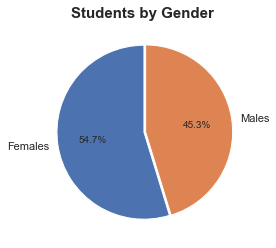

In [11]:
plt.pie(x= df['gender'].value_counts(),
        labels= ['Females','Males'],
        autopct='%1.1f%%',
        explode=[0.01,0.01],
        startangle=90)

plt.title('Students by Gender ', fontsize= 15, fontweight = 'bold')
plt.show()

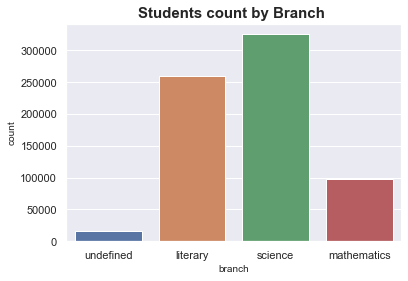

In [12]:
sns.countplot(x= df['branch'])

plt.title('Students count by Branch ', fontsize= 15, fontweight = 'bold')
plt.show()

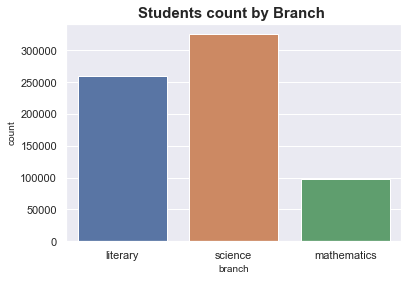

In [13]:
# drop undefined branch
df = df[df['branch'] != 'undefined']

sns.countplot(x= df['branch'])

plt.title('Students count by Branch ', fontsize= 15, fontweight = 'bold')
plt.show()

In [14]:
df.student_type.value_counts()

students           682347
Other qualities        59
Name: student_type, dtype: int64

In [15]:
df = df.drop('student_type', axis=1)

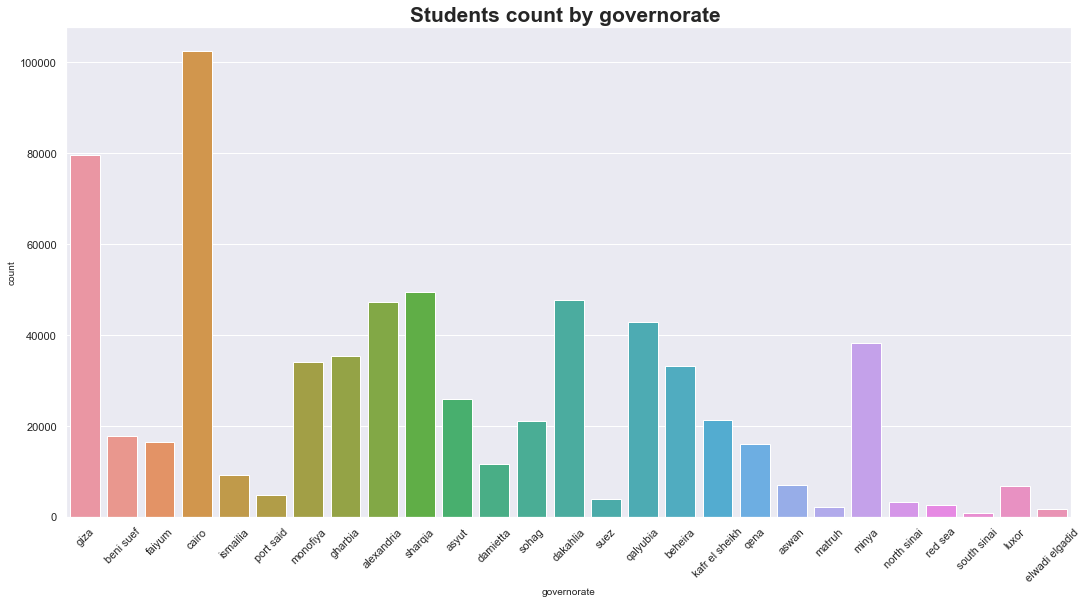

In [16]:
plt.figure(figsize= (18, 9))
sns.countplot(x= df['governorate'])

plt.title('Students count by governorate ', fontsize= 21, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

In [17]:
# top 5 governorates by students count
df['governorate'].value_counts()[:5]

cairo         102481
giza           79611
sharqia        49496
dakahlia       47777
alexandria     47223
Name: governorate, dtype: int64

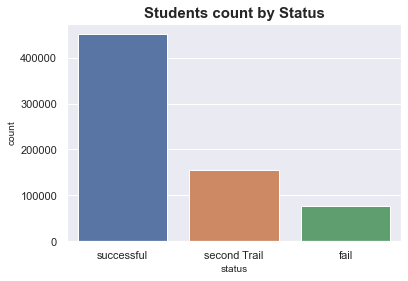

In [18]:
sns.countplot(x= df['status'])

plt.title('Students count by Status', fontsize= 15, fontweight = 'bold')
plt.show()

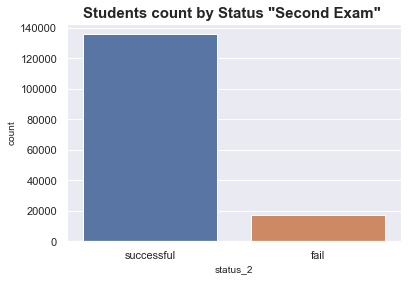

In [19]:
sns.countplot(x= df['status_2'])  

plt.title('Students count by Status "Second Exam" ', fontsize= 15, fontweight = 'bold')
plt.show()

## Data Wrangling

In [20]:
original_data = df.copy()
df= df.drop(['name'], axis=1)

In [21]:
df['percentage'] = df['percentage'].str.replace('%', '')
df['percentage_2'] = df['percentage_2'].str.replace('%', '')

#### In order to convert subject's datatypes to float we have 6 diffrent string values to focus on

- canceled
- مؤجل (means 'suspended')
- معفى (means 'exempt')
- absent
- unscheduled
- اجتياز (means 'Passed with unknown marks')

#### canceled, مؤجل, معفى

In [22]:
students_have_suspended = df[df.isin(['مؤجل']).any(axis=1)]
students_have_canceled = df[df.isin(['canceled']).any(axis=1)]
students_have_exempt = df[df.isin(['معفى']).any(axis=1)]

print(
    f'Number of students has atleast one SUSPENDED subject is {len(students_have_suspended)} percentage = {len(students_have_suspended)/len(df)}'
    f'\nNumber of students has atleast one CANCELED subject is {len(students_have_canceled)} percentage = {len(students_have_canceled)/len(df)}'
    f'\nNumber of students has atleast one EXEMPT subject is {len(students_have_exempt)} percentage = {len(students_have_exempt)/len(df)}'
     )

Number of students has atleast one SUSPENDED subject is 559 percentage = 0.0008191604411450076
Number of students has atleast one CANCELED subject is 436 percentage = 0.000638915836027233
Number of students has atleast one EXEMPT subject is 2430 percentage = 0.003560930003546276


- very small percentage.. dropping will be my choice

In [23]:
print(f'count before {len(df)}')
df = pd.concat([df, students_have_suspended, students_have_canceled, students_have_exempt]).drop_duplicates(keep=False)
print(f'count after {len(df)}')

count before 682406
count after 678988


#### absent, unscheduled
- unscheduled means The subject not for branch thats student belongs to .. so replacing it with np.nan will be easy choice

In [24]:
df.replace('unscheduled', np.nan, inplace = True)

In [25]:
len(df[df.isin(['absent']).any(axis=1)])

10400

- i will not drop students has 'absent' even if it only 10400 students, thats because all results of them 'fail' we dont want to drop chunk from miniority group (failures).

In [26]:
df.replace('absent', np.nan, inplace = True)

#### اجتياز (means 'Passed with unknown marks')

In [27]:
passed_with_unknown_marks = df[df.isin(['إجتياز']).any(axis=1)]
passed_with_unknown_marks

,seat_no,gender,branch,school_name,administration,governorate,arabic,first_foreign_lang,second_foreign_lang,physics,chemistry,biology,geology,pure_mathematics,applied_math,history,geography,philosophy,psychology,religion,national_education,economics_statistics,total,percentage,status,arabic_2,first_foreign_lang_2,second_foreign_lang_2,physics_2,chemistry_2,biology_2,geology_2,pure_mathematics_2,applied_math_2,history_2,geography_2,philosophy_2,psychology_2,religion_2,national_education_2,economics_statistics_2,total_2,percentage_2,status_2
3148,105551,F,science,الشهيد عبد الرحمن على البشيهى (ام المؤمنين ث ب...,شرق الفيوم,faiyum,46.5,30.5,29,59,30,58.5,48,NaN,NaN,NaN,NaN,NaN,NaN,إجتياز,إجتياز,إجتياز,301.50,73.54,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,105552,M,science,الشهيد محمد سيد عبد العزيز ابو شقره بنين,طامية,faiyum,74,48,40,45,53,51,58,NaN,NaN,NaN,NaN,NaN,NaN,إجتياز,إجتياز,إجتياز,369.00,90,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,105554,F,literary,منازل ادارة بولاق الدكرور بنات,بولاق الدكرور,giza,51,28,11,NaN,NaN,NaN,NaN,NaN,NaN,33,30,56,30,إجتياز,إجتياز,إجتياز,239.00,58.29,second Trail,51,28,20,NaN,NaN,NaN,NaN,NaN,NaN,33,30,56,30,إجتياز,إجتياز,إجتياز,248.00,60.49,successful
3152,105555,M,literary,كفر عمار ث م بنين,العياط,giza,40,36,20,NaN,NaN,NaN,NaN,NaN,NaN,31,49,50,30,إجتياز,إجتياز,إجتياز,256.00,62.44,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3153,105556,M,mathematics,منازل لغات اكتوبر بنين,أكتوبر,giza,44,41,22.5,39,49,NaN,NaN,36,31,NaN,NaN,NaN,NaN,إجتياز,إجتياز,إجتياز,262.50,64.02,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698190,937408,F,literary,منازل إدارة جهينة,جهينة,sohag,40,39,21,NaN,NaN,NaN,NaN,NaN,NaN,14,33,40,35,إجتياز,إجتياز,إجتياز,222.00,54.15,second Trail,40,39,21,NaN,NaN,NaN,NaN,NaN,NaN,30,33,40,35,إجتياز,إجتياز,إجتياز,238.00,58.05,successful
698191,937409,F,literary,منازل إدارة جهينة,جهينة,sohag,42,35,31,NaN,NaN,NaN,NaN,NaN,NaN,18,43,43,46,إجتياز,إجتياز,إجتياز,258.00,62.93,second Trail,42,35,31,NaN,NaN,NaN,NaN,NaN,NaN,30,43,43,46,إجتياز,إجتياز,إجتياز,270.00,65.85,successful
698192,937410,M,science,منازل إدارة جهينة,جهينة,sohag,40,46,20,44,48,45,48,NaN,NaN,NaN,NaN,NaN,NaN,إجتياز,إجتياز,إجتياز,291.00,70.98,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698193,937411,M,science,منازل إدارة جهينة,جهينة,sohag,59,47,31,46,49,60,58.5,NaN,NaN,NaN,NaN,NaN,NaN,إجتياز,إجتياز,إجتياز,350.50,85.49,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- its huge chunk from our entire dataset, but good news is we already know all of them are passed in these subjects & this value only exist in optional subjects .. thats means student total marks and percentage not affected by it.
- i will replace these values by mean of passed students marks in each subject

In [28]:
# take it out to get mean 
print(f'count before {len(df)}')
df_new = pd.concat([df, passed_with_unknown_marks]).drop_duplicates(keep=False)
print(f'count after {len(df_new)}')

count before 678988
count after 608099


In [29]:
# now we can change subjects datatypes to float
def to_float(targeted_dataframe):
    
    cols = targeted_dataframe.columns
    for c in cols:
        try:
            targeted_dataframe[c] = pd.to_numeric(targeted_dataframe[c])
        except:
            pass

In [30]:
to_float(df_new)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608099 entries, 3022 to 698188
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seat_no                 608099 non-null  int64  
 1   gender                  608099 non-null  object 
 2   branch                  608099 non-null  object 
 3   school_name             608099 non-null  object 
 4   administration          608099 non-null  object 
 5   governorate             608099 non-null  object 
 6   arabic                  605150 non-null  float64
 7   first_foreign_lang      603989 non-null  float64
 8   second_foreign_lang     605635 non-null  float64
 9   physics                 375529 non-null  float64
 10  chemistry               375904 non-null  float64
 11  biology                 289965 non-null  float64
 12  geology                 290294 non-null  float64
 13  pure_mathematics        86650 non-null   float64
 14  applied_math     

In [31]:
# describe passed students marks in religion (pass mark = 12.5)
df_new['religion'][df_new['religion']>= 12.5].describe()

count   606,072.00
mean         19.05
std           2.80
min          12.50
25%          17.00
50%          19.00
75%          21.00
max          25.00
Name: religion, dtype: float64

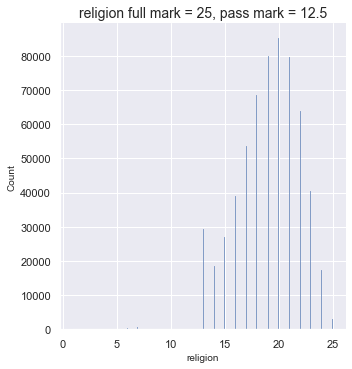

In [32]:
sns.displot(data=df_new, x="religion", kind="hist");

plt.title('religion full mark = 25, pass mark = 12.5', fontsize= 14)
plt.show()

- as we see even distribution will not be affected .. data already normally distributed 
- Mean equals Median = 19

In [33]:
df_new['national_education'][df_new['national_education']>= 12.5].describe()

count   605,067.00
mean         18.35
std           3.15
min          12.50
25%          16.00
50%          19.00
75%          21.00
max          25.00
Name: national_education, dtype: float64

In [34]:
# describe passed students marks in religion (pass mark = 25)
df_new['economics_statistics'][df_new['economics_statistics']>= 25].describe()

count   598,099.00
mean         29.92
std           4.81
min          25.00
25%          25.00
50%          29.00
75%          33.00
max          50.00
Name: economics_statistics, dtype: float64

In [35]:
# average of each subject at first & second exams
mean_of_passed_in_religion = df_new['religion'][df_new['religion']>= 12.5].mean()
mean_of_passed_in_religion_2 = df_new['religion_2'][df_new['religion_2']>= 12.5].mean()
mean_of_passed_in_nat_edu = df_new['national_education'][df_new['national_education']>= 12.5].mean()
mean_of_passed_in_nat_edu_2 = df_new['national_education_2'][df_new['national_education_2']>= 12.5].mean()
mean_of_passed_in_eco_stats = df_new['economics_statistics'][df_new['economics_statistics']>= 25].mean()
mean_of_passed_in_eco_stats_2 = df_new['economics_statistics_2'][df_new['economics_statistics_2']>= 25].mean()


passed_with_unknown_marks['religion'].replace(['إجتياز'], mean_of_passed_in_religion, inplace=True)
passed_with_unknown_marks['religion_2'].replace(['إجتياز'], mean_of_passed_in_religion_2, inplace=True)
passed_with_unknown_marks['national_education'].replace(['إجتياز'], mean_of_passed_in_nat_edu, inplace=True)
passed_with_unknown_marks['national_education_2'].replace(['إجتياز'], mean_of_passed_in_nat_edu_2, inplace=True)
passed_with_unknown_marks['economics_statistics'].replace(['إجتياز'], mean_of_passed_in_eco_stats, inplace=True)
passed_with_unknown_marks['economics_statistics_2'].replace(['إجتياز'], mean_of_passed_in_eco_stats_2, inplace=True)

In [36]:
# reset indexes after modifications
def df_updater(modified_dataframe_to_merge):
    df.set_index('seat_no', inplace=True)
    df.update(modified_dataframe_to_merge.set_index('seat_no'))
    df.reset_index(inplace=True)

In [37]:
df_updater(passed_with_unknown_marks)
len(df)

678988

- Now we can convert all subjects datatypes to float

In [38]:
to_float(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678988 entries, 0 to 678987
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seat_no                 678988 non-null  int64  
 1   gender                  678988 non-null  object 
 2   branch                  678988 non-null  object 
 3   school_name             678988 non-null  object 
 4   administration          678988 non-null  object 
 5   governorate             678988 non-null  object 
 6   arabic                  675614 non-null  float64
 7   first_foreign_lang      674412 non-null  float64
 8   second_foreign_lang     676087 non-null  float64
 9   physics                 416422 non-null  float64
 10  chemistry               416838 non-null  float64
 11  biology                 321146 non-null  float64
 12  geology                 321489 non-null  float64
 13  pure_mathematics        96450 non-null   float64
 14  applied_math        

In [40]:
df['status'].unique()

array(['successful', 'second Trail', 'fail'], dtype=object)

In [41]:
df['status'] = df['status'].str.lower()

In [42]:
df.describe()

,seat_no,arabic,first_foreign_lang,second_foreign_lang,physics,chemistry,biology,geology,pure_mathematics,applied_math,history,geography,philosophy,psychology,religion,national_education,economics_statistics,total,percentage,arabic_2,first_foreign_lang_2,second_foreign_lang_2,physics_2,chemistry_2,biology_2,geology_2,pure_mathematics_2,applied_math_2,history_2,geography_2,philosophy_2,psychology_2,religion_2,national_education_2,economics_statistics_2,total_2,percentage_2
count,"678,988.00","675,614.00","674,412.00","676,087.00","416,422.00","416,838.00","321,146.00","321,489.00","96,450.00","96,530.00","256,890.00","257,146.00","257,037.00","257,007.00","678,199.00","678,290.00","678,201.00","678,988.00","678,988.00","151,575.00","151,522.00","151,623.00","79,178.00","79,225.00","62,505.00","62,536.00","16,830.00","16,880.00","72,135.00","72,140.00","72,186.00","72,184.00","151,791.00","151,779.00","151,708.00","151,809.00","151,809.00"
mean,"515,622.16",50.06,32.91,29.05,35.60,38.70,35.98,43.48,37.22,39.47,32.74,33.10,38.08,37.71,19.03,18.31,29.68,259.12,63.20,44.42,28.50,24.81,30.84,31.84,31.97,36.38,31.56,32.13,31.46,31.79,35.66,35.48,17.88,16.93,27.28,229.37,55.95
std,"242,640.19",11.53,10.21,8.29,12.14,11.81,9.25,10.71,11.57,11.37,9.66,8.32,8.04,7.14,2.71,3.06,4.96,60.70,14.81,6.35,6.32,5.93,5.45,5.48,4.64,6.92,5.36,5.96,5.07,3.94,5.49,5.19,2.46,2.61,3.28,22.55,5.50
min,"105,410.00",1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,0.00,0.00,0.00,3.00,1.00,4.00,1.00,0.00,4.00,2.00,0.00,3.00,9.00,7.00,4.00,6.00,6.00,0.00,0.00,0.00
25%,"313,397.75",40.00,25.00,22.00,30.00,30.00,30.00,36.00,30.00,30.00,30.00,30.00,32.00,33.00,18.00,16.00,25.00,217.00,52.93,40.00,25.00,20.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,17.00,15.00,25.00,214.00,52.20
50%,"505,679.50",49.00,33.00,30.00,33.00,38.00,35.00,46.00,37.00,40.00,30.00,31.00,39.00,38.00,19.05,18.35,29.92,257.00,62.68,41.00,25.00,23.00,30.00,30.00,30.00,35.00,30.00,30.00,30.00,30.00,35.00,35.00,17.84,16.88,27.00,226.00,55.12
75%,"719,749.25",59.00,41.00,36.00,45.00,49.00,43.00,52.00,46.00,49.00,39.00,38.00,44.00,43.00,21.00,21.00,33.00,302.00,73.66,48.00,31.00,29.00,30.00,31.00,32.00,41.00,31.00,33.00,31.00,32.00,40.00,39.00,19.00,18.00,28.00,241.00,58.78
max,"937,412.00",80.00,50.00,40.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,25.00,25.00,50.00,407.00,99.27,80.00,50.00,40.00,59.00,60.00,60.00,60.00,59.00,59.00,60.00,60.00,60.00,60.00,25.00,25.00,50.00,390.00,95.12


In [43]:
#df.to_csv(r'thanaweya-data.csv')

## EDA

### Adding Regions and governorates population
- Since the first time I looked at the data in depth, I wanted to add 'Region' column even before start analyzing it. 
  I think i need it to be able to represent students performance and understand the patterns between the governorates and each other

In [44]:
#data = pd.read_csv('thanaweya-data.csv', chunksize=3000, index_col=0)
#df = pd.concat(data)
#df.head(1)

#### 1. Create governorates population & Region dataframe

In [98]:
governorates_population = pd.DataFrame(data= [['cairo','big cairo', 10200000], ['giza','big cairo', 9500000], 
                                             ['qalyubia','big cairo', 6100000], ['alexandria','alexandria', 5500000],
                                             ['beheira','alexandria', 6800000], ['matruh','alexandria', 525000],
                                             ['dakahlia','delta', 7000000], ['kafr el sheikh','delta', 4000000],
                                             ['gharbia','delta', 5400000], ['monofiya','delta', 4500000],
                                             ['damietta','delta', 1500000], ['port said','qanal', 790000],
                                             ['ismailia','qanal', 1500000], ['suez','qanal', 785000],
                                             ['sharqia','qanal', 7900000], ['south sinai','qanal', 115000],
                                             ['north sinai','qanal', 540000], ['beni suef','North upper egypt', 3500000],
                                             ['minya','North upper egypt', 6300000], ['faiyum','North upper egypt', 4000000],
                                             ['asyut','asyut', 5000000], ['elwadi elgadid','asyut', 260000],
                                             ['sohag','South upper egypt', 5700000], ['qena','South upper egypt', 3500000],
                                             ['luxor','South upper egypt', 1500000], ['aswan','South upper egypt', 1500000],
                                             ['red sea','South upper egypt', 400000]
                                            ],
                                      columns= ['governorate', 'region', 'population']
                                     )

Data source https://www.elwatannews.com/news/details/6387488

- In order to get insights here faster and easier way i will combine original data with this table

In [99]:
# add students to governorate percentage
student_per_governorate = df.governorate.value_counts().rename_axis('governorate').to_frame('students count')
governorates_population = pd.merge(governorates_population, student_per_governorate, on=['governorate'], how='left')
governorates_population['stu_per_pop'] = (governorates_population['students count']) / (governorates_population['population'] ) * 100

In [100]:
# add branches to governorate percentage
branch_per_governorate = df.groupby(['governorate', 'branch']).size().reset_index(name='count')
branch_per_governorate_pivot = branch_per_governorate.pivot_table(index='governorate', columns='branch', values='count', fill_value=0)
governorates_population = pd.merge(governorates_population, branch_per_governorate_pivot, on='governorate')
governorates_population['math_science'] = governorates_population['mathematics'] + governorates_population['science']

governorates_population['science_per'] = governorates_population['science'] / governorates_population['students count'] * 100
governorates_population['math_per'] = governorates_population['mathematics'] / governorates_population['students count'] * 100
governorates_population['math_science_per'] = governorates_population['math_science'] / governorates_population['students count'] * 100
governorates_population['literary_per'] = governorates_population['literary'] / governorates_population['students count'] * 100

In [101]:
# add status to governorate percentage
status_per_governorate = df.groupby(['governorate', 'status']).size().reset_index(name='count')
status_per_governorate_pivot = status_per_governorate.pivot_table(index='governorate', columns='status', values='count', fill_value=0)
governorates_population = pd.merge(governorates_population, status_per_governorate_pivot, on='governorate')
# fail and second trail
governorates_population['first_attempt_pass'] = governorates_population['successful'] / governorates_population['students count'] * 100
governorates_population['first_attempt_fail'] = governorates_population['fail'] / governorates_population['students count'] * 100
governorates_population['first_attempt_secondtrail'] = governorates_population['second trail'] / governorates_population['students count'] * 100

governorates_population['not_passed'] = governorates_population['fail'] + governorates_population['second trail']
governorates_population['first_attempt_fail'] = governorates_population['not_passed'] / governorates_population['students count'] * 100

In [102]:
# add status_2
first_trial_failed = df[df['status'] != 'successful']

status2_per_governorate = first_trial_failed.groupby(['governorate', 'status_2']).size().reset_index(name='count')
status2_per_governorate_pivot = status2_per_governorate.pivot_table(index='governorate', columns='status_2', values='count', fill_value=0)
governorates_population = pd.merge(governorates_population, status2_per_governorate_pivot, on='governorate')


governorates_population['second_attempt_pass'] = governorates_population['successful_y'] / governorates_population['second trail'] * 100
governorates_population['second_attempt_fail'] = governorates_population['fail_y'] / governorates_population['second trail'] * 100

# percentage of all passed and failed 1&2
governorates_population['all_final_pass'] = ((governorates_population['successful_x'] + governorates_population['successful_y']) / governorates_population['students count']) * 100
governorates_population['all_final_fail'] = ((governorates_population['fail_x'] + governorates_population['fail_y']) / governorates_population['students count']) * 100

In [103]:
status_per_branch = df.groupby(['governorate', 'branch', 'status']).size().reset_index(name='count')
status_per_branch = df.groupby(['governorate', 'branch', 'status']).size().reset_index(name='count')
status_per_branch_pivot = status_per_branch.pivot_table(index='governorate', columns=['branch', 'status'], values='count', 
                                                        fill_value=0)

governorates_population = pd.merge(governorates_population, status_per_branch_pivot, on='governorate')


governorates_population['math_fail'] = (governorates_population[('mathematics', 'fail')] + 
governorates_population[('mathematics', 'second trail')]) / governorates_population['mathematics'] * 100

governorates_population['science_fail'] = (governorates_population[('science', 'fail')] + 
governorates_population[('science', 'second trail')]) / governorates_population['science'] * 100

governorates_population['literary_fail'] = (governorates_population[('literary', 'fail')] + 
governorates_population[('literary', 'second trail')]) / governorates_population['literary'] * 100

governorates_population['math_science_fail'] = (governorates_population[('mathematics', 'fail')] + 
governorates_population[('mathematics', 'second trail')] + governorates_population[('science', 'fail')] + 
governorates_population[('science', 'second trail')]) / (governorates_population['mathematics'] + governorates_population['science']) * 100

In [104]:
governorates_population.head()

,governorate,region,population,students count,stu_per_pop,literary,mathematics,science,math_science,science_per,math_per,math_science_per,literary_per,fail_x,second trail,successful_x,first_attempt_pass,first_attempt_fail,first_attempt_secondtrail,not_passed,fail_y,successful_y,second_attempt_pass,second_attempt_fail,all_final_pass,all_final_fail,"(literary, fail)","(literary, second trail)","(literary, successful)","(mathematics, fail)","(mathematics, second trail)","(mathematics, successful)","(science, fail)","(science, second trail)","(science, successful)",math_fail,science_fail,literary_fail,math_science_fail
0,cairo,big cairo,10200000,101651,1.00,46759,20944,33948,54892,33.40,20.60,54.00,46.00,12804,26008,62839,61.82,38.18,25.59,38812,3063,22709,87.32,11.78,84.16,15.61,6178,13562,27019,2196,4518,14230,4430,7928,21590,32.06,36.40,42.22,34.74
1,giza,big cairo,9500000,79163,0.83,37888,11906,29369,41275,37.10,15.04,52.14,47.86,14654,23676,40833,51.58,48.42,29.91,38330,3709,19981,84.39,15.67,76.82,23.20,6941,12450,18497,1819,2900,7187,5894,8326,15149,39.64,48.42,51.18,45.88
2,qalyubia,big cairo,6100000,42584,0.70,18919,7277,16388,23665,38.48,17.09,55.57,44.43,4439,10385,27760,65.19,34.81,24.39,14824,668,9633,92.76,6.43,87.81,11.99,2155,5552,11212,650,1371,5256,1634,3462,11292,27.77,31.10,40.74,30.07
3,alexandria,alexandria,5500000,46935,0.85,20289,9393,17253,26646,36.76,20.01,56.77,43.23,3976,10457,32502,69.25,30.75,22.28,14433,1015,9184,87.83,9.71,88.82,10.63,1534,4860,13895,684,1781,6928,1758,3816,11679,26.24,32.31,31.51,30.17
4,beheira,alexandria,6800000,32997,0.49,9034,2318,21645,23963,65.60,7.02,72.62,27.38,2952,7076,22969,69.61,30.39,21.44,10028,732,6210,87.76,10.34,88.43,11.16,832,2543,5659,169,325,1824,1951,4208,15486,21.31,28.45,37.36,27.76


In [105]:
#governorates_population.to_csv(r'governorates-population.csv')

### students count vs governorates population

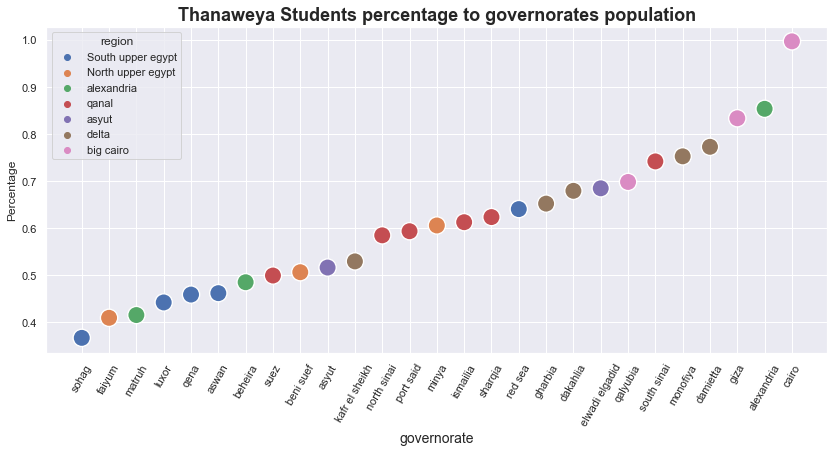

In [121]:
sorted_df = governorates_population.sort_values('stu_per_pop')

plt.figure(figsize=(14,6))

sns.scatterplot(data= sorted_df, x='governorate', y='stu_per_pop', hue= 'region', s= 300);

plt.title('Thanaweya Students percentage to governorates population',  fontsize= 18, fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Percentage',  fontsize= 12)
plt.xlabel('governorate',  fontsize= 14)
plt.savefig('1.png')
plt.show()

- 4 out of lower 6 governorates is from South upper egypt and big cairo far away with 1% of its population Thanaweya Students
- 1 of every 100 person in cairo is Thanaweya student vs only 1 of every +250 in sohag

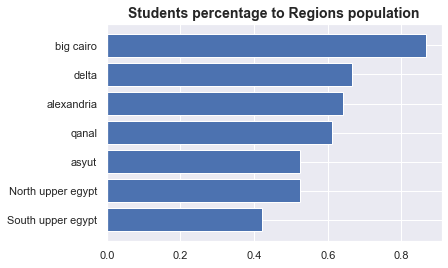

In [122]:
students_per_region = governorates_population.groupby('region').sum().reset_index()
students_per_region['stu_per_region'] = (students_per_region['students count'] / students_per_region['population']) * 100 
sorted_df = students_per_region.sort_values('stu_per_region')

plt.barh(sorted_df['region'], sorted_df['stu_per_region']);

plt.title('Students percentage to Regions population',  fontsize= 14, fontweight = 'bold')
plt.savefig('2.png')
plt.show()

- upper egypt regions (south upper egypt, North upper egypt, asyout) has lowest student-to-population percentage  

In [108]:
sorted_df.stu_per_region.quantile([0.25,0.5,0.75])

0.25   0.52
0.50   0.61
0.75   0.65
Name: stu_per_region, dtype: float64

### status per governorate

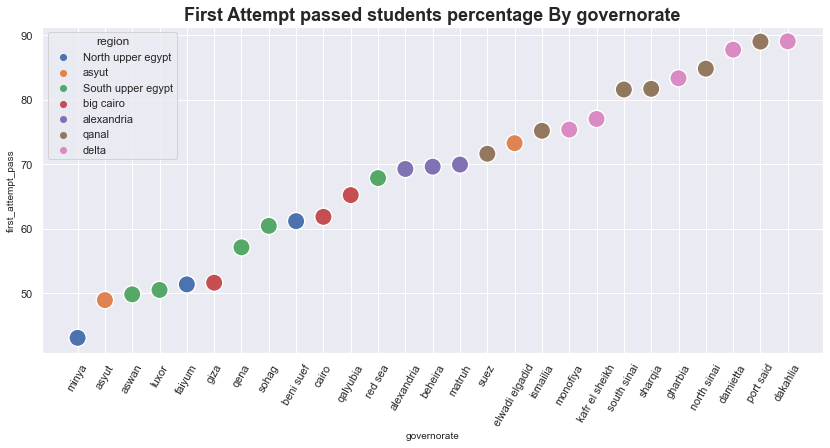

In [123]:
sorted_df = governorates_population.sort_values('first_attempt_pass')

plt.figure(figsize=(14,6))
ax = sns.scatterplot(sorted_df['governorate'], sorted_df['first_attempt_pass'], hue= sorted_df['region'], s=300);

plt.xticks(rotation = 60)
plt.title('First Attempt passed students percentage By governorate',  fontsize= 18, fontweight = 'bold')
plt.savefig('3.png')
plt.show()

- Top 10 governorate all from Delta and Qanal regions
- giza on worst 5 governorates and cairo in worst 10 list, The rest of the list all from upper egypt (south upper egypt, north upper egypt, asyout)
- only delta and qanal has governorates with 75% passed students from first trial! actualy 10/11 governorates are over 75% success rate
- dakahliya and port said only two governorates with +89% success rate
- only minya and asyout success rate less than 50%
- The 3 alexendria governorates very close to each other

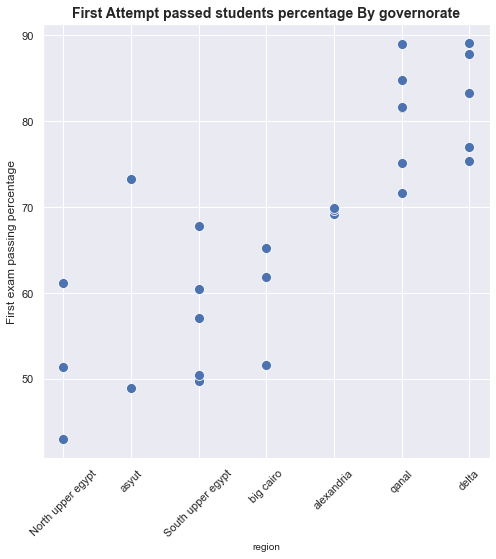

In [110]:
sorted_df = governorates_population.sort_values('first_attempt_pass')

plt.figure(figsize=(8,8))
sns.scatterplot(sorted_df['region'], sorted_df['first_attempt_pass'], s= 100);

plt.title('First Attempt passed students percentage By governorate',  fontsize= 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('First exam passing percentage',  fontsize= 12)
plt.show()

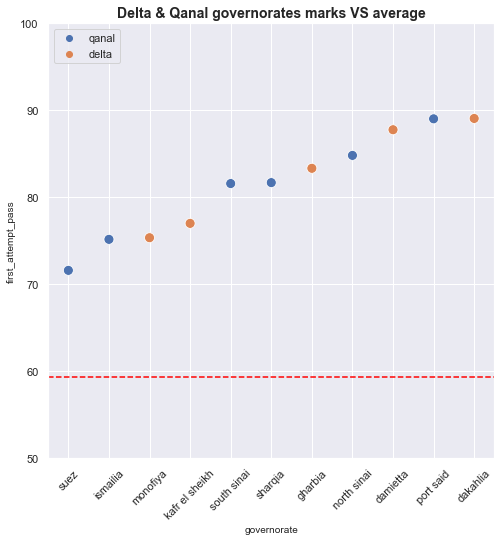

In [124]:
mean_without_delta_qanal = governorates_population[(governorates_population['region']!= 'qanal') & (governorates_population['region']!= 'delta')]
all_regions_mean = mean_without_delta_qanal['first_attempt_pass'].sum() / mean_without_delta_qanal['first_attempt_pass'].count()

sorted_sample = governorates_population[(governorates_population['region']== 'delta') | (governorates_population['region']== 'qanal')].sort_values('first_attempt_pass')

plt.figure(figsize=(8,8))

sns.scatterplot(sorted_sample['governorate'], sorted_sample['first_attempt_pass'], hue=sorted_sample['region'], s= 100);

plt.xticks(rotation = 45)
plt.axhline(y= all_regions_mean, color='red', linestyle='--')
plt.ylim(50, 100)
plt.legend(loc= 'upper left')
plt.title('Delta & Qanal governorates marks VS average',  fontsize= 14, fontweight= 'bold')
plt.savefig('4.png')
plt.show()

### status_2 (final result after second trail)

In [112]:
# governorates finall results 
governorates_population[['region','governorate','all_final_fail']].sort_values('all_final_fail')

,region,governorate,all_final_fail
11,qanal,port said,1.94
6,delta,dakahlia,2.01
10,delta,damietta,2.59
16,qanal,north sinai,3.29
14,qanal,sharqia,4.22
8,delta,gharbia,4.31
15,qanal,south sinai,5.16
21,asyut,elwadi elgadid,5.90
7,delta,kafr el sheikh,6.17
12,qanal,ismailia,6.46


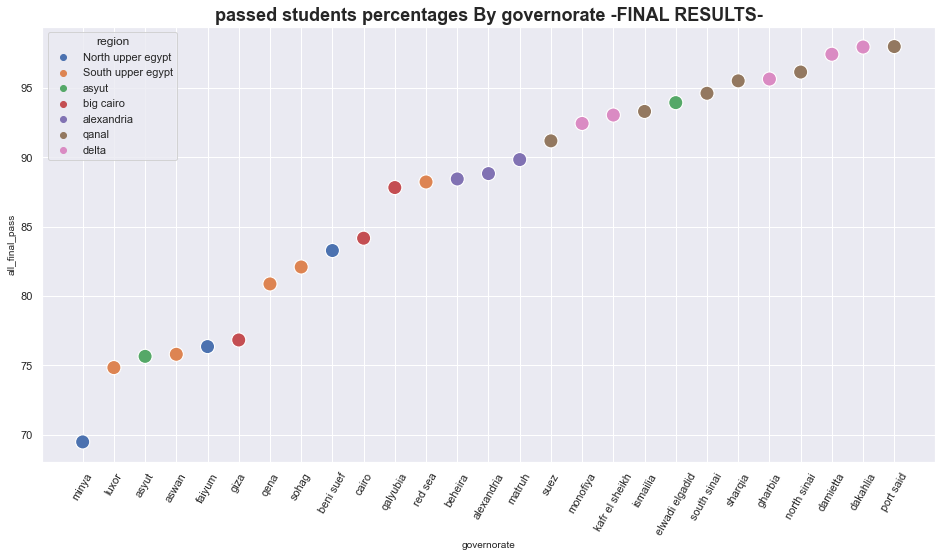

In [125]:
sorted_df = governorates_population.sort_values('all_final_pass')
plt.figure(figsize=(16,8))

sns.scatterplot(sorted_df['governorate'], sorted_df['all_final_pass'], hue= sorted_df['region'], s=200);

plt.xticks(rotation = 60)
plt.title('passed students percentages By governorate -FINAL RESULTS-',  fontsize= 18, fontweight= 'bold')
plt.savefig('5.png')
plt.show()

- All Delta and Qanal governorates success rate +91%
- Minya governorate from North upper egypt has lower success rate (under 70%)

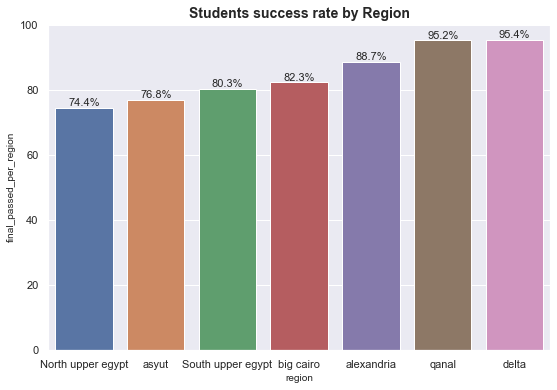

In [126]:
final_passed_per_region = governorates_population.groupby('region').sum().reset_index()
final_passed_per_region['final_passed_per_region'] = ((final_passed_per_region['successful_x'] + final_passed_per_region['successful_y']) / final_passed_per_region['students count']) * 100 

sorted_df = final_passed_per_region.sort_values('final_passed_per_region')

plt.figure(figsize=(9,6))

ax = sns.barplot(sorted_df['region'], sorted_df['final_passed_per_region']);

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()), 
            ha='center', va='bottom', fontsize=11)
plt.title('Students success rate by Region',  fontsize= 14, fontweight= 'bold')
plt.savefig('6.png')
plt.show()

### Students Branches by Region

In [115]:
governorates_population[['region','governorate','literary_per']].sort_values('literary_per', ascending=False)

,region,governorate,literary_per
1,big cairo,giza,47.86
0,big cairo,cairo,46.00
2,big cairo,qalyubia,44.43
3,alexandria,alexandria,43.23
26,South upper egypt,red sea,43.09
5,alexandria,matruh,41.61
18,North upper egypt,minya,40.52
21,asyut,elwadi elgadid,39.44
13,qanal,suez,39.35
11,qanal,port said,38.86


In [116]:
governorates_population['literary_per'].mean()

35.438177437778926

- great cairo 3 governorates are top 3 governorates studies literary with 46% compared to 35% average

In [117]:
governorates_population[['region','governorate','math_per']].sort_values('math_per', ascending=False)

,region,governorate,math_per
13,qanal,suez,24.25
11,qanal,port said,22.76
0,big cairo,cairo,20.60
3,alexandria,alexandria,20.01
10,delta,damietta,19.24
2,big cairo,qalyubia,17.09
26,South upper egypt,red sea,16.12
9,delta,monofiya,16.01
6,delta,dakahlia,15.58
12,qanal,ismailia,15.51


In [118]:
governorates_population['math_per'].mean()

12.88241948598525

- A quarter of suez students studies mathematics branch 'Double of The other governorates average'

In [119]:
governorates_population[['region','governorate','science_per']].sort_values('science_per', ascending=False)

,region,governorate,science_per
16,qanal,north sinai,74.64
4,alexandria,beheira,65.60
7,delta,kafr el sheikh,64.98
25,South upper egypt,aswan,62.49
22,South upper egypt,sohag,61.90
24,South upper egypt,luxor,61.69
19,North upper egypt,faiyum,58.68
20,asyut,asyut,57.24
23,South upper egypt,qena,56.74
21,asyut,elwadi elgadid,55.22


In [120]:
governorates_population['science_per'].mean()

51.67940307623581

- 75% of north sinai studies science branch compared to 51% average

In [68]:
branch_per_region = governorates_population[['region','students count', 'mathematics', 'science', 'literary']]
branch_per_region = branch_per_region.groupby('region').sum().reset_index()

branch_per_region['math_per'] = branch_per_region['mathematics'] / branch_per_region['students count'] * 100
branch_per_region['science_per'] = branch_per_region['science'] / branch_per_region['students count'] * 100
branch_per_region['literary_per'] = branch_per_region['literary'] / branch_per_region['students count'] * 100

branch_per_region = branch_per_region.sort_values('mathematics')
branch_per_region.drop(['students count','mathematics','science','literary'],axis= 1, inplace= True)
branch_per_region

,region,math_per,science_per,literary_per
3,asyut,7.20,57.11,35.69
1,South upper egypt,8.10,59.37,32.53
0,North upper egypt,9.01,54.53,36.46
6,qanal,15.00,50.45,34.55
2,alexandria,14.44,48.74,36.82
5,delta,14.58,54.74,30.68
4,big cairo,17.96,35.68,46.36


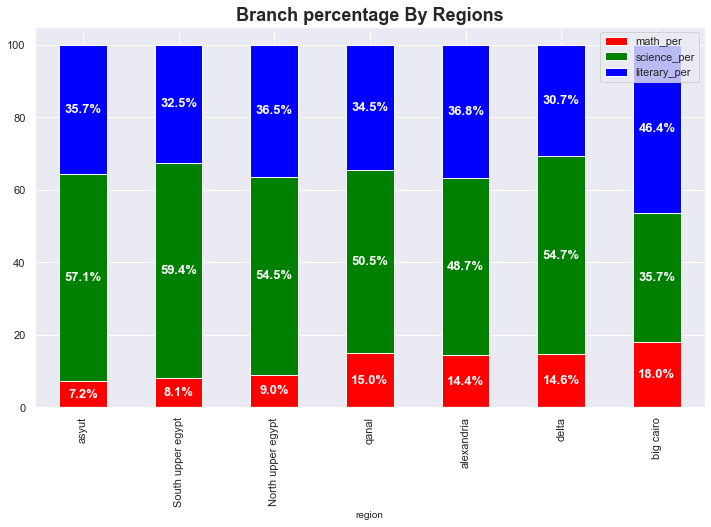

In [127]:
ax = branch_per_region.set_index('region').plot(kind='bar', stacked=True, color=['red', 'green', 'blue'], figsize=(12,7))

for container in ax.containers:
    for i, child in enumerate(container):
        ax.text(child.get_x() + child.get_width() / 2, child.get_y() + child.get_height() / 2,
                f'{child.get_height():,.1f}%', ha='center', va='center', color='white', fontsize=13, fontweight='bold')
        
plt.title('Branch percentage By Regions',  fontsize= 18, fontweight= 'bold')
plt.savefig('10.png')
plt.show()

- upper egypt regions not prefare mathematics branch with only 8% compared to 15% average 
- great cairo regions (cairo, giza, qalyubia) prefare to study literary with 46% compared to 35% average
- great cairo are lowest region studies science with only 35& compared to 51% average

## Top students 

In [70]:
sorted_df = df.sort_values('total', ascending=False)
sorted_df.head()

,seat_no,gender,branch,school_name,administration,governorate,arabic,first_foreign_lang,second_foreign_lang,physics,chemistry,biology,geology,pure_mathematics,applied_math,history,geography,philosophy,psychology,religion,national_education,economics_statistics,total,percentage,status,arabic_2,first_foreign_lang_2,second_foreign_lang_2,physics_2,chemistry_2,biology_2,geology_2,pure_mathematics_2,applied_math_2,history_2,geography_2,philosophy_2,psychology_2,religion_2,national_education_2,economics_statistics_2,total_2,percentage_2,status_2
514299,740865,M,literary,المصرية الانجليزية لغات,شرق الزقازيق,sharqia,77.00,50.00,40.00,NaN,NaN,NaN,NaN,NaN,NaN,60.00,60.00,60.00,60.00,23.00,25.00,34.00,407.00,99.27,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461921,654591,M,mathematics,الشهيد العقيد أ . ح / محمد فاروق عبدالقادر سلي...,كفر صقر,sharqia,79.00,49.00,40.00,60.00,59.00,NaN,NaN,60.00,60.00,NaN,NaN,NaN,NaN,25.00,25.00,43.00,407.00,99.27,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13114,119071,F,mathematics,الاورمان ع ث بنات,العجوزة,giza,78.00,50.00,40.00,60.00,60.00,NaN,NaN,58.00,60.00,NaN,NaN,NaN,NaN,24.00,23.00,37.00,406.00,99.02,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425537,616942,M,mathematics,السادات الثانوية بنين بالمحلة,شرق المحلة,gharbia,76.00,50.00,39.00,60.00,60.00,NaN,NaN,60.00,60.00,NaN,NaN,NaN,NaN,21.00,23.00,41.00,405.00,98.78,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420585,611941,M,mathematics,قطور الثانوية المشتركة,قطور,gharbia,76.00,50.00,40.00,59.00,60.00,NaN,NaN,60.00,60.00,NaN,NaN,NaN,NaN,21.00,25.00,40.00,405.00,98.78,successful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
top_01 = int(len(df) / 1000)
top_1 = int(len(df) / 100)

top_hundred = sorted_df.iloc[:100].reset_index(drop=True)
top_01_percentage = sorted_df.iloc[:top_01].reset_index(drop=True)
top_1_percentage = sorted_df.iloc[:top_1].reset_index(drop=True)

### top 100 students

In [72]:
top_hundred.gender.value_counts()

M    82
F    18
Name: gender, dtype: int64

In [73]:
top_hundred.branch.value_counts()

mathematics    91
science         6
literary        3
Name: branch, dtype: int64

### top 0.1% students

In [74]:
top_01_percentage.gender.value_counts()

M    510
F    168
Name: gender, dtype: int64

In [75]:
top_01_percentage.branch.value_counts()

mathematics    425
science        238
literary        15
Name: branch, dtype: int64

### top 1% students

In [76]:
len(top_1_percentage)

6789

In [77]:
top_1_percentage.gender.value_counts()

M    4269
F    2520
Name: gender, dtype: int64

In [78]:
top_1_percentage.branch.value_counts()

science        4847
mathematics    1873
literary         69
Name: branch, dtype: int64

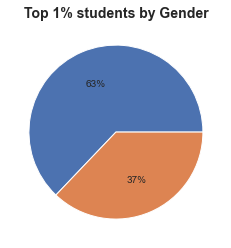

In [128]:
plt.pie(top_1_percentage.gender.value_counts(), autopct='%1.f%%');

plt.title('Top 1% students by Gender', fontsize=14, fontweight = 'bold')
plt.savefig('11.png')
plt.show()

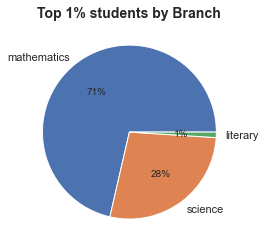

In [129]:
plt.pie(top_1_percentage.branch.value_counts(),labels=['mathematics', 'science', 'literary'], autopct='%1.f%%');

plt.title('Top 1% students by Branch', fontsize=14, fontweight = 'bold')
plt.savefig('12.png')
plt.show()

- Top 1% = 6789 students 

### Crucial Subject for each branch

In [81]:
literary_branch = df[df['branch']== 'literary']
science_branch = df[df['branch']== 'science']
mathematics_branch = df[df['branch']== 'mathematics']

literary_cor = literary_branch[['history', 'geography','philosophy', 'psychology', 'status', 'total']]
science_cor = science_branch[['physics', 'chemistry','biology', 'geology', 'status', 'total']]
mathematics_cor = mathematics_branch[['physics', 'chemistry','pure_mathematics', 'applied_math', 'status', 'total']]

# add branch total
literary_cor['branch_total'] = literary_cor[['history', 'geography','philosophy', 'psychology']].sum(axis=1)
science_cor['branch_total'] = science_cor[['physics', 'chemistry','biology', 'geology']].sum(axis=1)
mathematics_cor['branch_total'] = mathematics_cor[['physics', 'chemistry','pure_mathematics', 'applied_math']].sum(axis=1)


literary_cor.replace({'successful': 1, 'second trail': 0, 'fail': 0}, inplace=True)
science_cor.replace({'successful': 1, 'second trail': 0, 'fail': 0}, inplace=True)
mathematics_cor.replace({'successful': 1, 'second trail': 0, 'fail': 0}, inplace=True)


literary_matrix = literary_cor.corr()
science_matrix = science_cor.corr()
mathematics_matrix = mathematics_cor.corr()


literary_result = literary_matrix.loc[['history', 'geography', 'philosophy', 'psychology'], ['status', 'branch_total']]
science_result = science_matrix.loc[['physics', 'chemistry', 'biology', 'geology'], ['status', 'branch_total']]
mathematics_result = mathematics_matrix.loc[['physics', 'chemistry', 'pure_mathematics', 'applied_math'], ['status', 'branch_total']]

In [82]:
literary_result

,status,branch_total
history,0.56,0.85
geography,0.55,0.82
philosophy,0.56,0.84
psychology,0.54,0.81


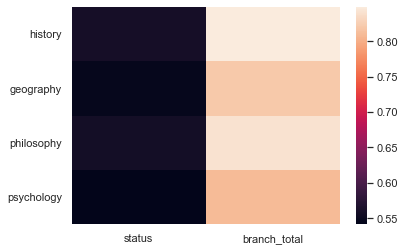

In [143]:
sns.heatmap(literary_result);
plt.yticks(rotation=0)

plt.savefig('16.png')
plt.show()

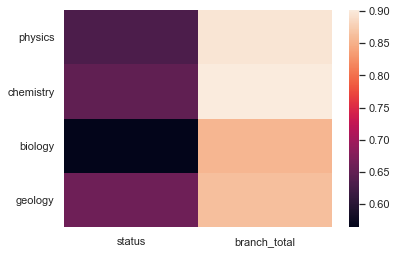

In [141]:
sns.heatmap(science_result);

plt.yticks(rotation=0)

plt.savefig('17.png')
plt.show()

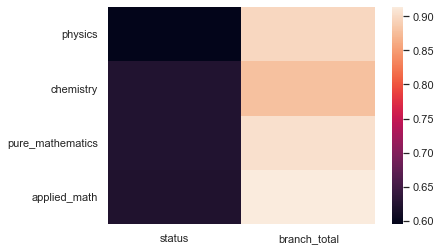

In [142]:
sns.heatmap(mathematics_result);

plt.yticks(rotation=0)

plt.savefig('18.png')
plt.show()

#### With slight deffrence, i see the follwing:
- History subject is the most important in Literary branch
- Chemistry subject is the most important in Science branch
- Applied Math subject is the most important in Mathematics branch

## subjects by gender

In [86]:
subset_df = df.iloc[:, [1] + list(range(9, 19))]
subjects_means_by_gender = subset_df.groupby('gender', as_index=False).mean()
subjects_means_by_gender

,gender,physics,chemistry,biology,geology,pure_mathematics,applied_math,history,geography,philosophy,psychology
0,F,33.09,36.92,34.60,42.21,33.26,35.71,31.81,32.40,38.26,38.13
1,M,38.61,40.84,38.29,45.59,38.79,40.95,33.90,33.96,37.86,37.18


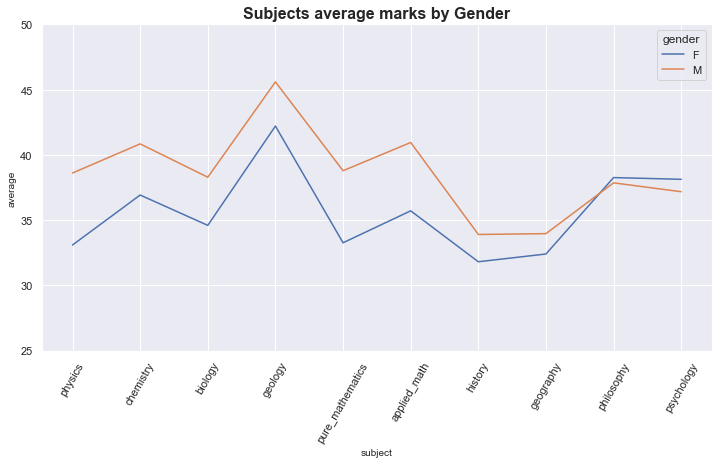

In [130]:
# Melt the DataFrame
melted_df = pd.melt(subjects_means_by_gender, id_vars=['gender'], var_name='subject', value_name='average')

plt.figure(figsize=(12,6))
ax= sns.lineplot(data=melted_df, x='subject', y='average', hue='gender')

plt.title('Subjects average marks by Gender', fontsize= 16, fontweight= 'bold')
ax.set_ylim([25, 50])
plt.xticks(rotation = 60)
plt.savefig('13.png')
plt.show()

- Females outperform Males only in 2 subjects (philosophy, psychology) both in Literary branch
- Males are much better in chemistry, pure_mathematics, applied_math
- History are hardest subject for both genders and geology are the easiest

## Top Schools by governorates

In [88]:
def group_schools_by_branch(branch_df):
    
    # aggregate schools
    branch_schools = branch_df.groupby('school_name').agg({'seat_no':'count','total':'sum'})
    branch_schools['average_total'] = branch_schools['total'] / branch_schools['seat_no']
    branch_schools.rename(columns={'seat_no':'students_count'}, inplace=True)
    branch_schools.drop(['total'],axis= 1, inplace= True)
    
    # add school's governorate and administration columns
    branch_schools = branch_schools.merge(branch_df[['school_name', 'governorate', 'administration']].drop_duplicates(), on='school_name')
    
    # drop schools with less than 25 students
    branch_schools = branch_schools[branch_schools.students_count >= 25]
    
    # add school's region from governorate_population dataframe
    branch_schools['region'] = branch_schools['governorate'].map(governorates_population.set_index('governorate')['region'])
    
    return branch_schools

In [89]:
literary_schools = group_schools_by_branch(literary_branch)
science_schools = group_schools_by_branch(science_branch)
mathematics_schools = group_schools_by_branch(mathematics_branch)
all_schools = group_schools_by_branch(df)

In [90]:
all_schools.head()

,school_name,students_count,average_total,governorate,administration,region
0,( الشهيد مهنى محمد مهنى مؤمن) سابقاً طبهار ث م...,141,257.12,faiyum,ابشواى,North upper egypt
1,( الشهيد مهنى محمد مهنى مؤمن) سابقاً طبهار ث م...,110,253.46,faiyum,ابشواى,North upper egypt
2,25 يناير الثانوية الرسمية لغات,45,223.36,cairo,المعصره,big cairo
3,25 يناير الثانوية بنات,375,268.76,ismailia,شمال الاسماعيلية,qanal
4,25يناير الثانوية بنات,92,267.23,alexandria,برج العرب,alexandria


In [134]:
top_20_schools = all_schools.sort_values('average_total', ascending=False).head(20)
worst_20_schools = all_schools.sort_values('average_total', ascending=False).tail(20)

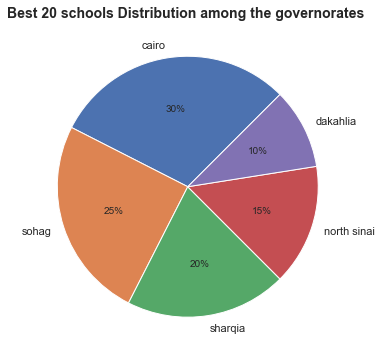

In [137]:
plt.figure(figsize=(6,6))
plt.pie(top_20_schools.governorate.value_counts(), labels=top_20_schools.governorate.unique(), autopct='%1.f%%', startangle=45);

plt.title('Best 20 schools Distribution among the governorates ', fontsize= 14, fontweight= 'bold')
plt.savefig('14.png')
plt.show()

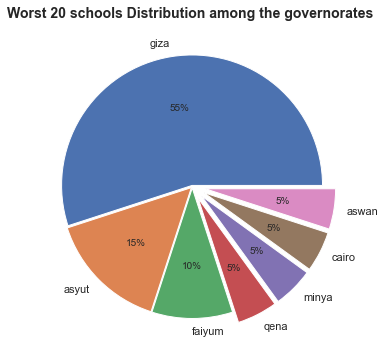

In [138]:
plt.figure(figsize=(6,6))
plt.pie(worst_20_schools.governorate.value_counts(), labels=worst_20_schools.governorate.unique(), autopct='%1.f%%',
        explode=[0.01,0.01,0.01,0.1,0.1,0.1,0.1]);

plt.title('Worst 20 schools Distribution among the governorates ', fontsize= 14, fontweight= 'bold')
plt.savefig('15.png')
plt.show()